In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
from matplotlib import pyplot as plt

https://www.kaggle.com/c/bike-sharing-demand/data

```
datetime - hourly date + timestamp  
season - 
    1 = spring, 
    2 = summer, 
    3 = fall, 
    4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 
    1: Clear, Few clouds, Partly cloudy, Partly cloudy 
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
```

In [3]:
train = pd.read_csv('data/train.csv.gz', compression='gzip')
train.datetime = pd.to_datetime(train.datetime)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [14]:
train['hour'] = train['datetime'].apply(lambda row: row.hour)
train['day'] = train['datetime'].apply(lambda row: row.day)
train['month'] = train['datetime'].apply(lambda row: row.month)
train['year'] = train['datetime'].apply(lambda row: row.year)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
hour          10886 non-null int64
day           10886 non-null int64
month         10886 non-null int64
year          10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(12)
memory usage: 1.3 MB


In [16]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.001729,0.971524,-0.004797
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,-0.015877,0.001731,0.012021
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,0.009829,-0.003394,-0.002482
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,-0.007890,0.012144,-0.012548
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.015551,0.257589,0.061226
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.011866,0.264173,0.058540
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,-0.011335,0.204537,-0.078606
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,0.036157,-0.150192,-0.015221
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.014109,0.092722,0.145241
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.019111,0.169451,0.264265


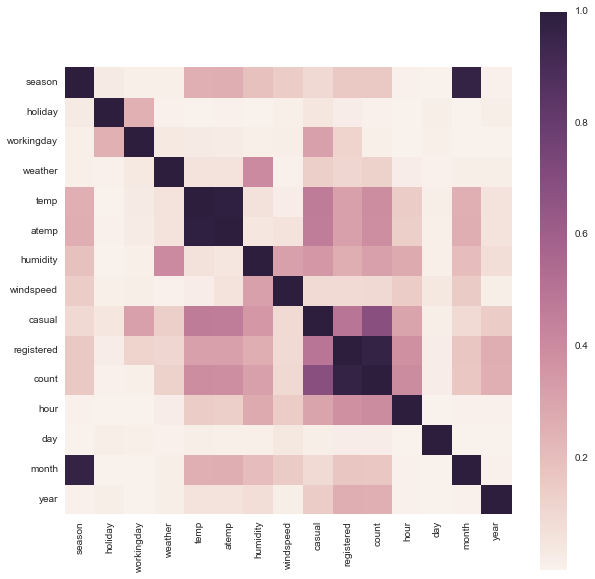

In [17]:
plt.subplots(figsize=(10,10))
sns.heatmap(np.abs(train.corr()), square=True)

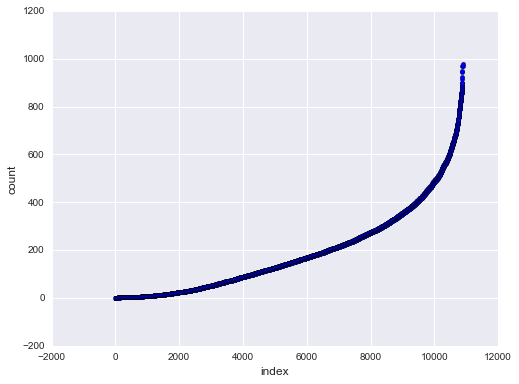

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train['count'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.show()

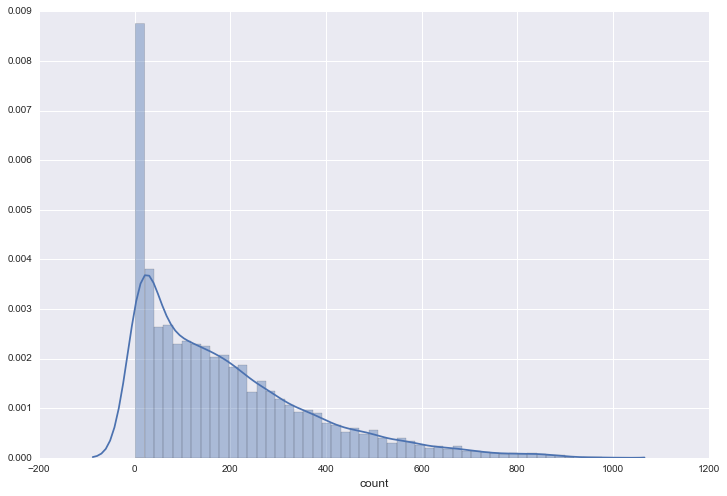

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(train['count'].values, bins=50, kde=True)
plt.xlabel('count', fontsize=12)
plt.show()

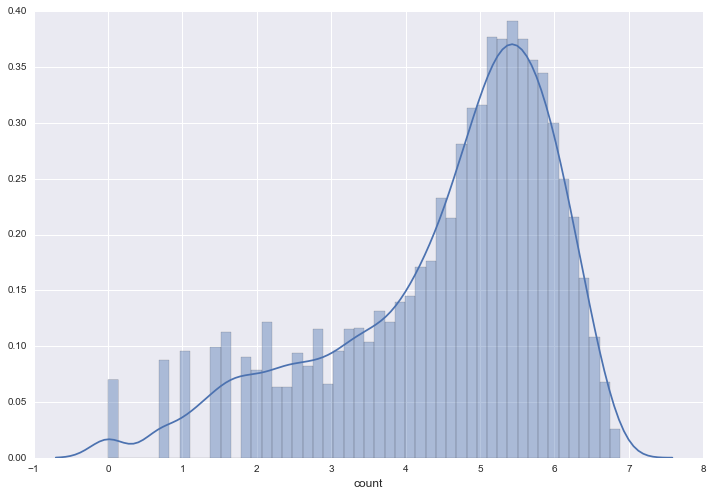

In [8]:
plt.figure(figsize=(12,8))
sns.distplot(np.log(train['count'].values), bins=50, kde=True)
plt.xlabel('count', fontsize=12)
plt.show()

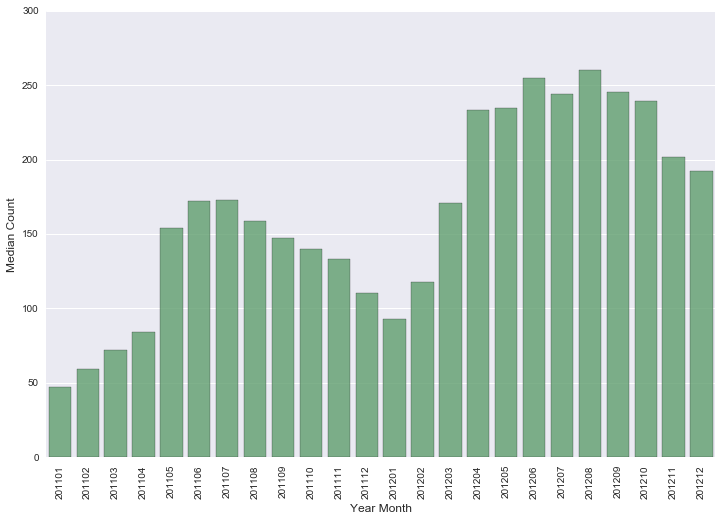

In [45]:
tmp = pd.DataFrame(index=train.index)
tmp['count'] = train['count']
tmp['year_month'] = train['year'] * 100 + train['month']
group_by_year_month = tmp.groupby('year_month')['count'].aggregate(np.median).reset_index()

plt.figure(figsize=(12,8))
sns.barplot(group_by_year_month['year_month'].values, group_by_year_month['count'].values, alpha=0.8, color=color[1])
plt.ylabel('Median Count', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

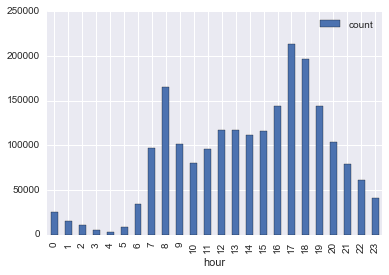

In [175]:
train[['count', 'hour']].groupby(['hour']).sum().plot(kind='bar')

        count
season       
1        2686
2        2733
3        2733
4        2734


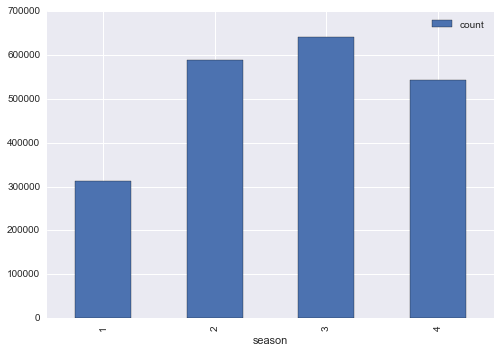

In [27]:
print(train[['count', 'season']].groupby(['season']).count())
train[['count', 'season']].groupby(['season']).sum().plot(kind='bar')

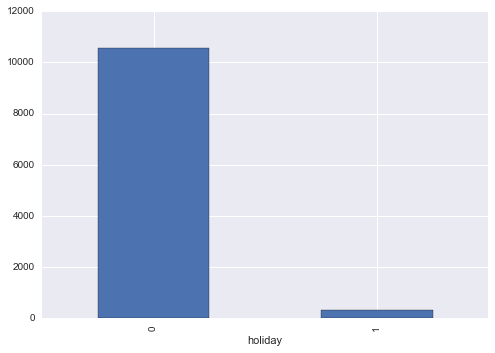

In [43]:
# посмотрим сколько всего записей с праздниками. Маловато!
train.groupby(['holiday'])['count'].count().plot(kind='bar')

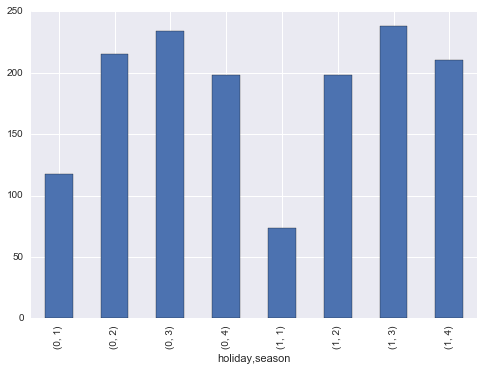

In [36]:
train.groupby(['holiday', 'season'])['count'].mean().plot(kind='bar')

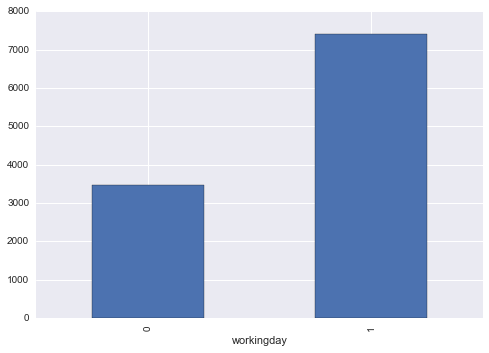

In [44]:
train.groupby(['workingday'])['count'].count().plot(kind='bar')

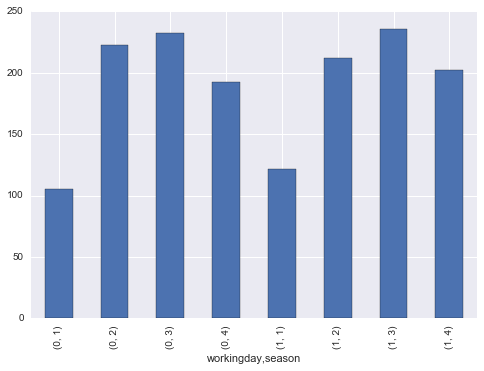

In [48]:
train.groupby(['workingday', 'season'])['count'].mean().plot(kind='bar')

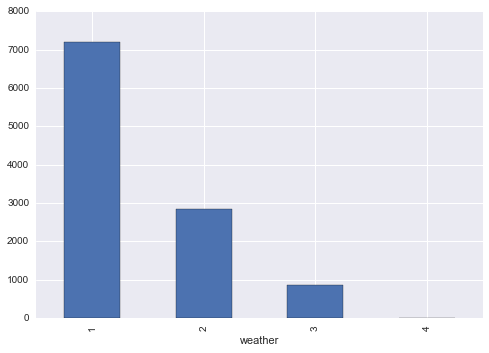

In [50]:
train.groupby(['weather'])['count'].count().plot(kind='bar')

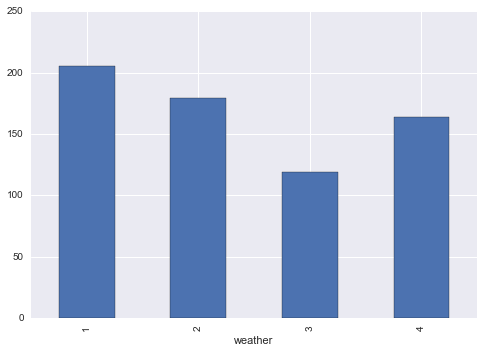

In [59]:
train.groupby(['weather'])['count'].mean().plot(kind='bar')

In [61]:
# Странные люди!!
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


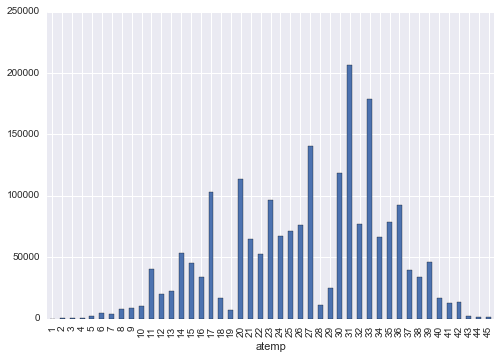

In [139]:
hist = pd.DataFrame(index=train.index)
hist['atemp'] = train.apply(lambda row: int(np.round(row['atemp'])), axis=1)
hist['count'] = train['count']
hist.groupby(['atemp'])['count'].sum().plot(kind='bar')

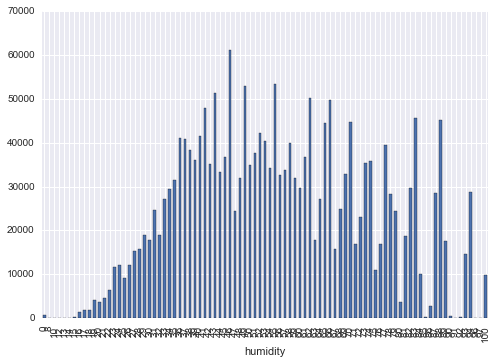

In [141]:
train.groupby(['humidity'])['count'].sum().plot(kind='bar')

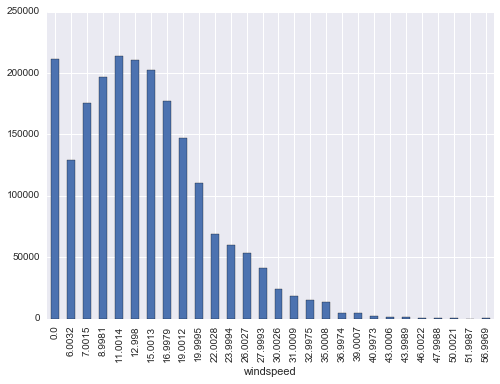

In [145]:
train.groupby(['windspeed'])['count'].sum().plot(kind='bar')

признак `windspeed` смещён влево, есть длинный хвост, поэтому нужно логарифмировать.

# Select features

In [134]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']]
y = train['count']

# Metrics

In [87]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

The RMSLE is calculated as

$$
\epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }
$$

Where:

\\(\epsilon\\) is the RMSLE value (score)

\\(n\\) is the total number of observations in the (public/private) data set,

\\(p_i\\) is your prediction, and

\\(a_i\\) is the actual response  for  \\(i\\). 

\\(\log(x)\\) is the natural logarithm of \\(x\\)

In [83]:
def rmsle(y, y_):
    print(y_.min())
    log1 = np.nan_to_num(np.log1p(y))
    log2 = np.nan_to_num(np.log1p(y_))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Dummy prediction

In [94]:
from sklearn.dummy import DummyRegressor

score = cross_val_score(DummyRegressor(strategy='median'), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

174.0
138.0
154.0
129.0
130.0


-1.4939176284469264

# Baseline

In [84]:
score = cross_val_score(linear_model.Lasso(), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

-49.851619425
83.1824939022
-61.4557299306
10.5295125312
3.61937515405


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


-1.4673475983411266

In [85]:
score = cross_val_score(linear_model.Ridge(), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

-52.3187855916
83.8519703966
-64.6502840273
9.02339502483
-3.43617459564


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


-1.4709112281439749

In [89]:
score = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

5.9955952381
9.35092857143
4.364
14.5283333333
7.7525


-1.4159469128471633

# Visualize prediction

In [102]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [141]:
clf = linear_model.Lasso()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [142]:
rmsle(pred, y_test.values)

1


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


1.4309524170609644

In [143]:
prediction = pd.DataFrame()
prediction['pred'] = pred
prediction['actual'] = y_test.values
prediction['error'] = prediction['pred'] - prediction['actual']
prediction['error_rate'] = prediction['error'] / prediction['actual']
prediction.head()

,pred,actual,error,error_rate
0,318.075731,127,191.075731,1.504533
1,51.691778,13,38.691778,2.976291
2,180.733288,163,17.733288,0.108793
3,280.706349,233,47.706349,0.204748
4,258.820730,222,36.820730,0.165859


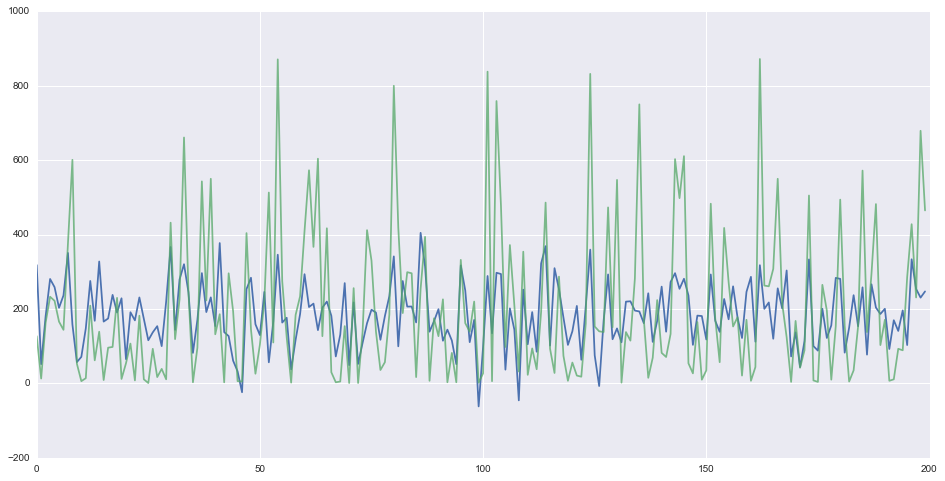

In [144]:
plt.figure(figsize=(16,8))
plt.plot(prediction['pred'][:200])
plt.plot(prediction['actual'][:200], alpha=0.75)

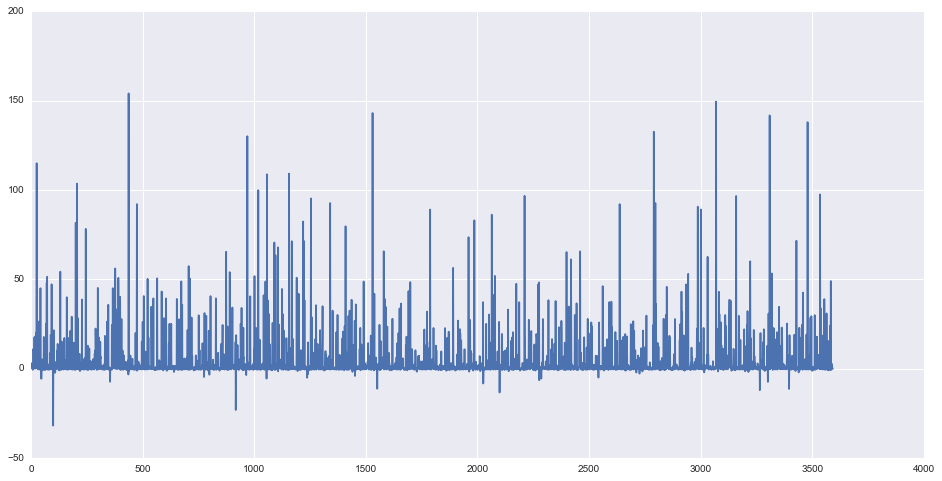

In [145]:
plt.figure(figsize=(16,8))
plt.plot(prediction['error_rate'])

# Feature engineering

In [146]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'day', 'month', 'year'],
      dtype='object')

In [148]:
X = train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'day', 'month', 'year']]
y = train['count']

In [149]:
score = cross_val_score(linear_model.Lasso(), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

-171.837997036
-11.2661834786
-34.9233378166
43.847253496
65.3276714739


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


-1.3545220220797152

In [150]:
score = cross_val_score(RandomForestRegressor(n_estimators=100), X, y, cv=5, scoring=rmsle_scorer)
score.mean()

1.55
3.49
1.36
2.47
3.11


-0.49108001372987575

In [164]:
def describeImportance(clf, X):
    indices = np.argsort(clf.feature_importances_)[::-1]
    for f in range(X.shape[1]):
        print('%d. feature %d %s (%f)' % (f + 1, indices[f], X.columns[indices[f]],
                                          clf.feature_importances_[indices[f]]))
        
def describeCoeff(clf, X):
    indices = np.argsort(clf.coef_)[::-1]
    for f in range(X.shape[1]):
        print('%d. feature %d %s (%f)' % (f + 1, indices[f], X.columns[indices[f]],
                                          clf.coef_[indices[f]]))

In [156]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)

describeImportance(clf, X)

1. feature 8 hour (0.613743)
2. feature 11 year (0.087961)
3. feature 4 temp (0.076489)
4. feature 2 workingday (0.070671)
5. feature 10 month (0.047363)
6. feature 6 humidity (0.029965)
7. feature 5 atemp (0.026907)
8. feature 3 weather (0.014810)
9. feature 9 day (0.011958)
10. feature 7 windspeed (0.008841)
11. feature 0 season (0.008501)
12. feature 1 holiday (0.002790)


In [174]:
clf = linear_model.Lasso()
clf.fit(X, y)

describeCoeff(clf, X)

1. feature 11 year (78.582240)
2. feature 8 hour (7.728047)
3. feature 10 month (7.436050)
4. feature 5 atemp (4.508093)
5. feature 4 temp (1.841903)
6. feature 7 windspeed (0.539928)
7. feature 9 day (0.351681)
8. feature 2 workingday (0.000000)
9. feature 1 holiday (-0.000000)
10. feature 0 season (-0.000000)
11. feature 3 weather (-1.708252)
12. feature 6 humidity (-2.092418)
